# Explore here

In [1]:
CLIENT_ID="e0b0ecd677c84e38912e2f6448fbe3c1"
CLIENT_SECRET="8b71b592126b448d8bad03e45fd1bbe0"


In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

Python-dotenv could not parse statement starting at line 3
Python-dotenv could not parse statement starting at line 5


In [3]:
import pandas as pd
import numpy as np

print(f"Pandas version: {pd.__version__}, NumPy version: {np.__version__}")

Pandas version: 2.2.3, NumPy version: 2.1.1


In [12]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd

# Define your credentials
SPOTIPY_CLIENT_ID = "e0b0ecd677c84e38912e2f6448fbe3c1"
SPOTIPY_CLIENT_SECRET = "8b71b592126b448d8bad03e45fd1bbe0"
SPOTIPY_REDIRECT_URI = "http://localhost/"

# Initialize Spotipy with Spotify credentials
# Authentication with Spotify using Spotipy's OAuth method
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=SPOTIPY_CLIENT_ID,
    client_secret=SPOTIPY_CLIENT_SECRET,
    redirect_uri=SPOTIPY_REDIRECT_URI,
    scope="user-library-read"
))

# Fetch top tracks of an artist by artist_id
artist_id = "378dH6EszOLFShpRzAQkVM"
response = sp.artist_top_tracks(artist_id)

try:
    # Fetch the artist's top tracks
    top_tracks = sp.artist_top_tracks(artist_id)

    # Create a list of dictionaries to store song data
    track_data = []
    for track in top_tracks['tracks']:
        track_data.append({
            'Track Name': track['name'],
            'Popularity': track['popularity'],
            'Duration (min)': (track['duration_ms'] / (1000 * 60)) % 60,
            'Duration (sec)': (track['duration_ms'] / 1000) % 60
        })

    # Convert the list of dictionaries into a Pandas DataFrame
    df = pd.DataFrame(track_data)

    # Display the DataFrame
    print(df)

except spotipy.exceptions.SpotifyException as e:
    print(f"An error occurred: {e}")

                                          Track Name  Popularity  \
0                                 Carol Of The Bells          65   
1                     Shatter Me Featuring Lzzy Hale          60   
2                                   Roundtable Rival          60   
3                                        Crystallize          53   
4                              Eye Of The Untold Her          54   
5                                        Underground          56   
6                                        Radioactive          54   
7                                          The Arena          48   
8                 Survive [Feat. Walk Off The Earth]          53   
9  7 Years (Acoustic) - Recorded at Spotify Studi...          53   

   Duration (min)  Duration (sec)  
0        2.768217          46.093  
1        4.679983          40.799  
2        3.387983          23.279  
3        4.313333          18.800  
4        3.679550          40.773  
5        4.371917          22.315  

In [13]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))

In [15]:
artist_id = "378dH6EszOLFShpRzAQkVM" 
response = sp.artist_top_tracks(artist_id)


In [16]:
if response:
  # We keep the "tracks" object of the answer
  tracks = response["tracks"]
  # We select, for each song, the data we are interested in and discard the rest
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

In [17]:
import pandas as pd

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df.head(3))

   duration_ms                                               name  popularity
7     3.871333                                          The Arena          48
3     4.313333                                        Crystallize          53
9     2.457117  7 Years (Acoustic) - Recorded at Spotify Studi...          53


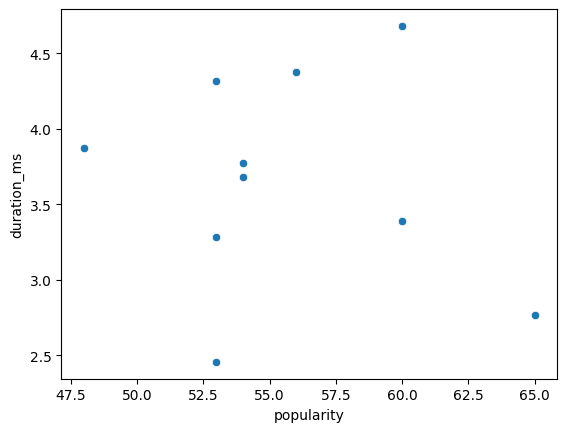

In [19]:
import seaborn as sns

scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")